In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/ds_project_3_train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/ds_project_3_test.csv')

In [ ]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# dalam rangka memudahkan pembelajaran, kita hanya mengambil beberapa kolom saja dari dataset
df_train = df_train[['LotArea','YearBuilt','OverallQual', 'OverallCond','GrLivArea','MiscFeature','GarageArea',\
                     'KitchenQual', 'SalePrice']]

In [ ]:
df_train

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual,SalePrice
0,8450,2003,7,5,1710,NaN,548,Gd,208500
1,9600,1976,6,8,1262,NaN,460,TA,181500
2,11250,2001,7,5,1786,NaN,608,Gd,223500
3,9550,1915,7,5,1717,NaN,642,Gd,140000
4,14260,2000,8,5,2198,NaN,836,Gd,250000
...,...,...,...,...,...,...,...,...,...
1455,7917,1999,6,5,1647,NaN,460,TA,175000
1456,13175,1978,6,6,2073,NaN,500,TA,210000
1457,9042,1941,7,9,2340,Shed,252,Gd,266500
1458,9717,1950,5,6,1078,NaN,240,Gd,142125


In [ ]:
df_test = df_test[['LotArea','YearBuilt','OverallQual', 'OverallCond','GrLivArea','MiscFeature','GarageArea',\
                     'KitchenQual']]

In [ ]:
df_test

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,11622,1961,5,6,896,NaN,730.0,TA
1,14267,1958,6,6,1329,Gar2,312.0,Gd
2,13830,1997,5,5,1629,NaN,482.0,TA
3,9978,1998,6,6,1604,NaN,470.0,Gd
4,5005,1992,8,5,1280,NaN,506.0,Gd
...,...,...,...,...,...,...,...,...
1454,1936,1970,4,7,1092,NaN,0.0,TA
1455,1894,1970,4,5,1092,NaN,286.0,TA
1456,20000,1960,5,7,1224,NaN,576.0,TA
1457,10441,1992,5,5,970,Shed,0.0,TA


In [ ]:
df_train.describe()

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1971.267808,6.099315,5.575342,1515.463699,472.980137,180921.195890
std,9981.264932,30.202904,1.382997,1.112799,525.480383,213.804841,79442.502883
min,1300.000000,1872.000000,1.000000,1.000000,334.000000,0.000000,34900.000000
25%,7553.500000,1954.000000,5.000000,5.000000,1129.500000,334.500000,129975.000000
50%,9478.500000,1973.000000,6.000000,5.000000,1464.000000,480.000000,163000.000000
75%,11601.500000,2000.000000,7.000000,6.000000,1776.750000,576.000000,214000.000000
max,215245.000000,2010.000000,10.000000,9.000000,5642.000000,1418.000000,755000.000000


<Axes: xlabel='SalePrice', ylabel='Count'>

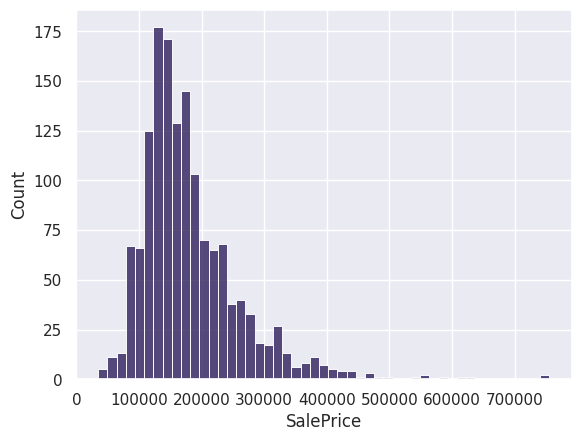

In [ ]:
sns.set_theme(palette='magma')
sns.histplot(df_train['SalePrice'])

In [ ]:
# hitung nilai skewness dan kurtosisnya
# skewness: ukuran statistik yang digunakan untuk mengukur sejauh mana distribusi data cenderung miring atau tidak simetris
# Kurtosis: ukuran statistik yang digunakan untuk mengukur sejauh mana distribusi data cenderung
# memiliki ekor panjang (outliers) dan puncak tajam (peakedness) dibandingkan dengan distribusi normal
# (distribusi Gauss atau distribusi berbentuk lonceng).

print(f"Skewness: {df_train['SalePrice'].skew()}")
print(f"Kurtosis: {df_train['SalePrice'].kurt()}")

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


# **Scatterplot GrLivArea terhadap terget variable**

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

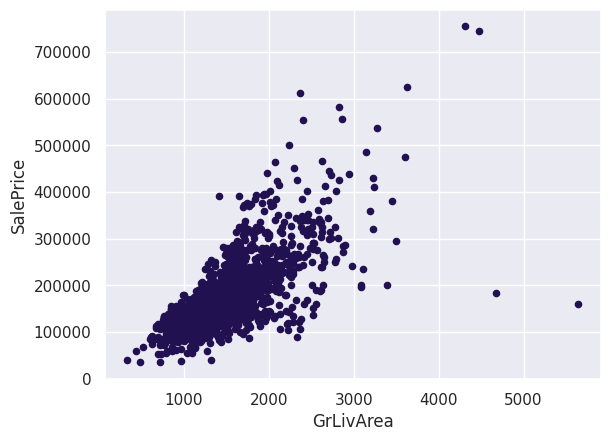

In [ ]:
# data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)
df_train.plot.scatter(x='GrLivArea', y='SalePrice')

# **Boxplot antara OverallQual dengan target variable**

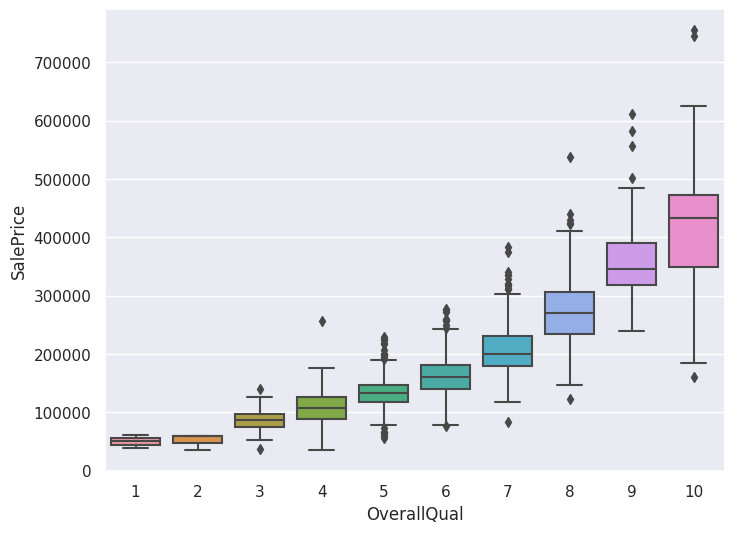

In [ ]:
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)

In [ ]:
df_train[(df_train['OverallQual']==10)&(df_train['SalePrice']<200000)]

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual,SalePrice
523,40094,2007,10,5,4676,NaN,884,Ex,184750
1298,63887,2008,10,5,5642,NaN,1418,Ex,160000


# **Boxplot antara YearBuilt dengan target variable**

In [ ]:
df_train['YearBuilt'].max()

2010

In [ ]:
df_train['YearBuilt'].unique()

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
       1872, 1905])

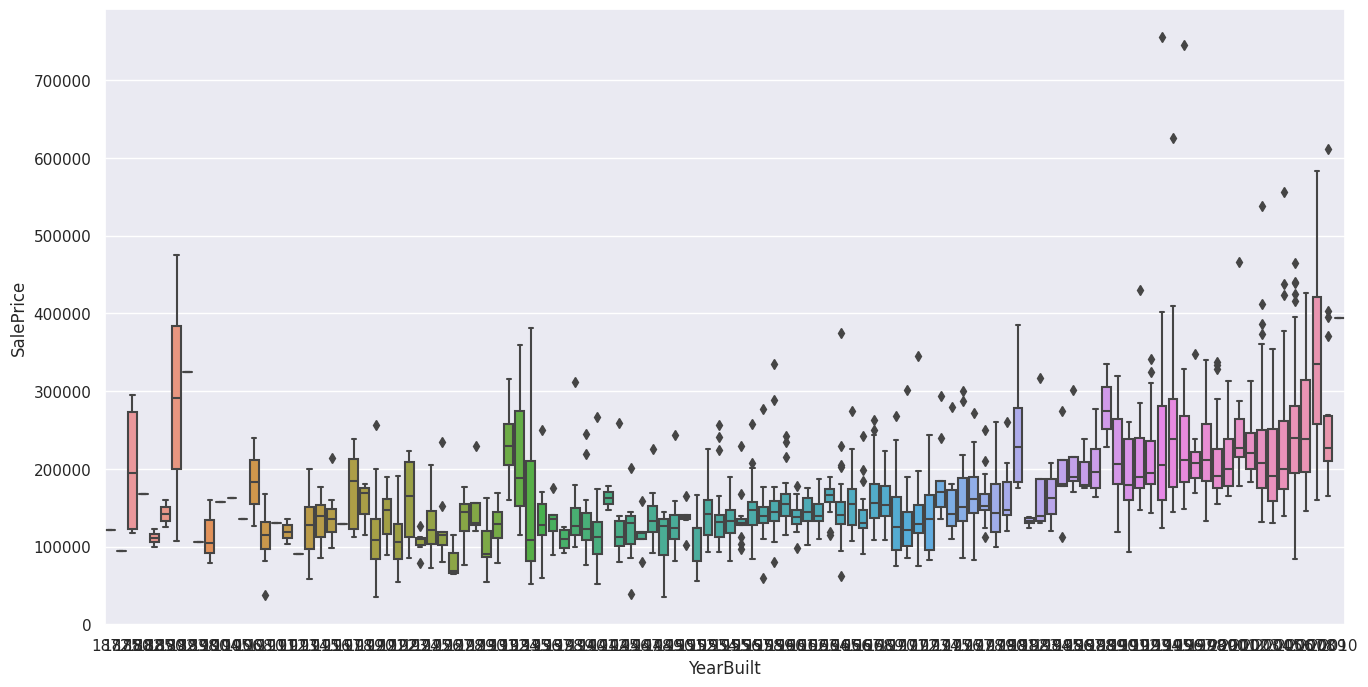

In [ ]:
data = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=data)

# **Correlation map antar variable**

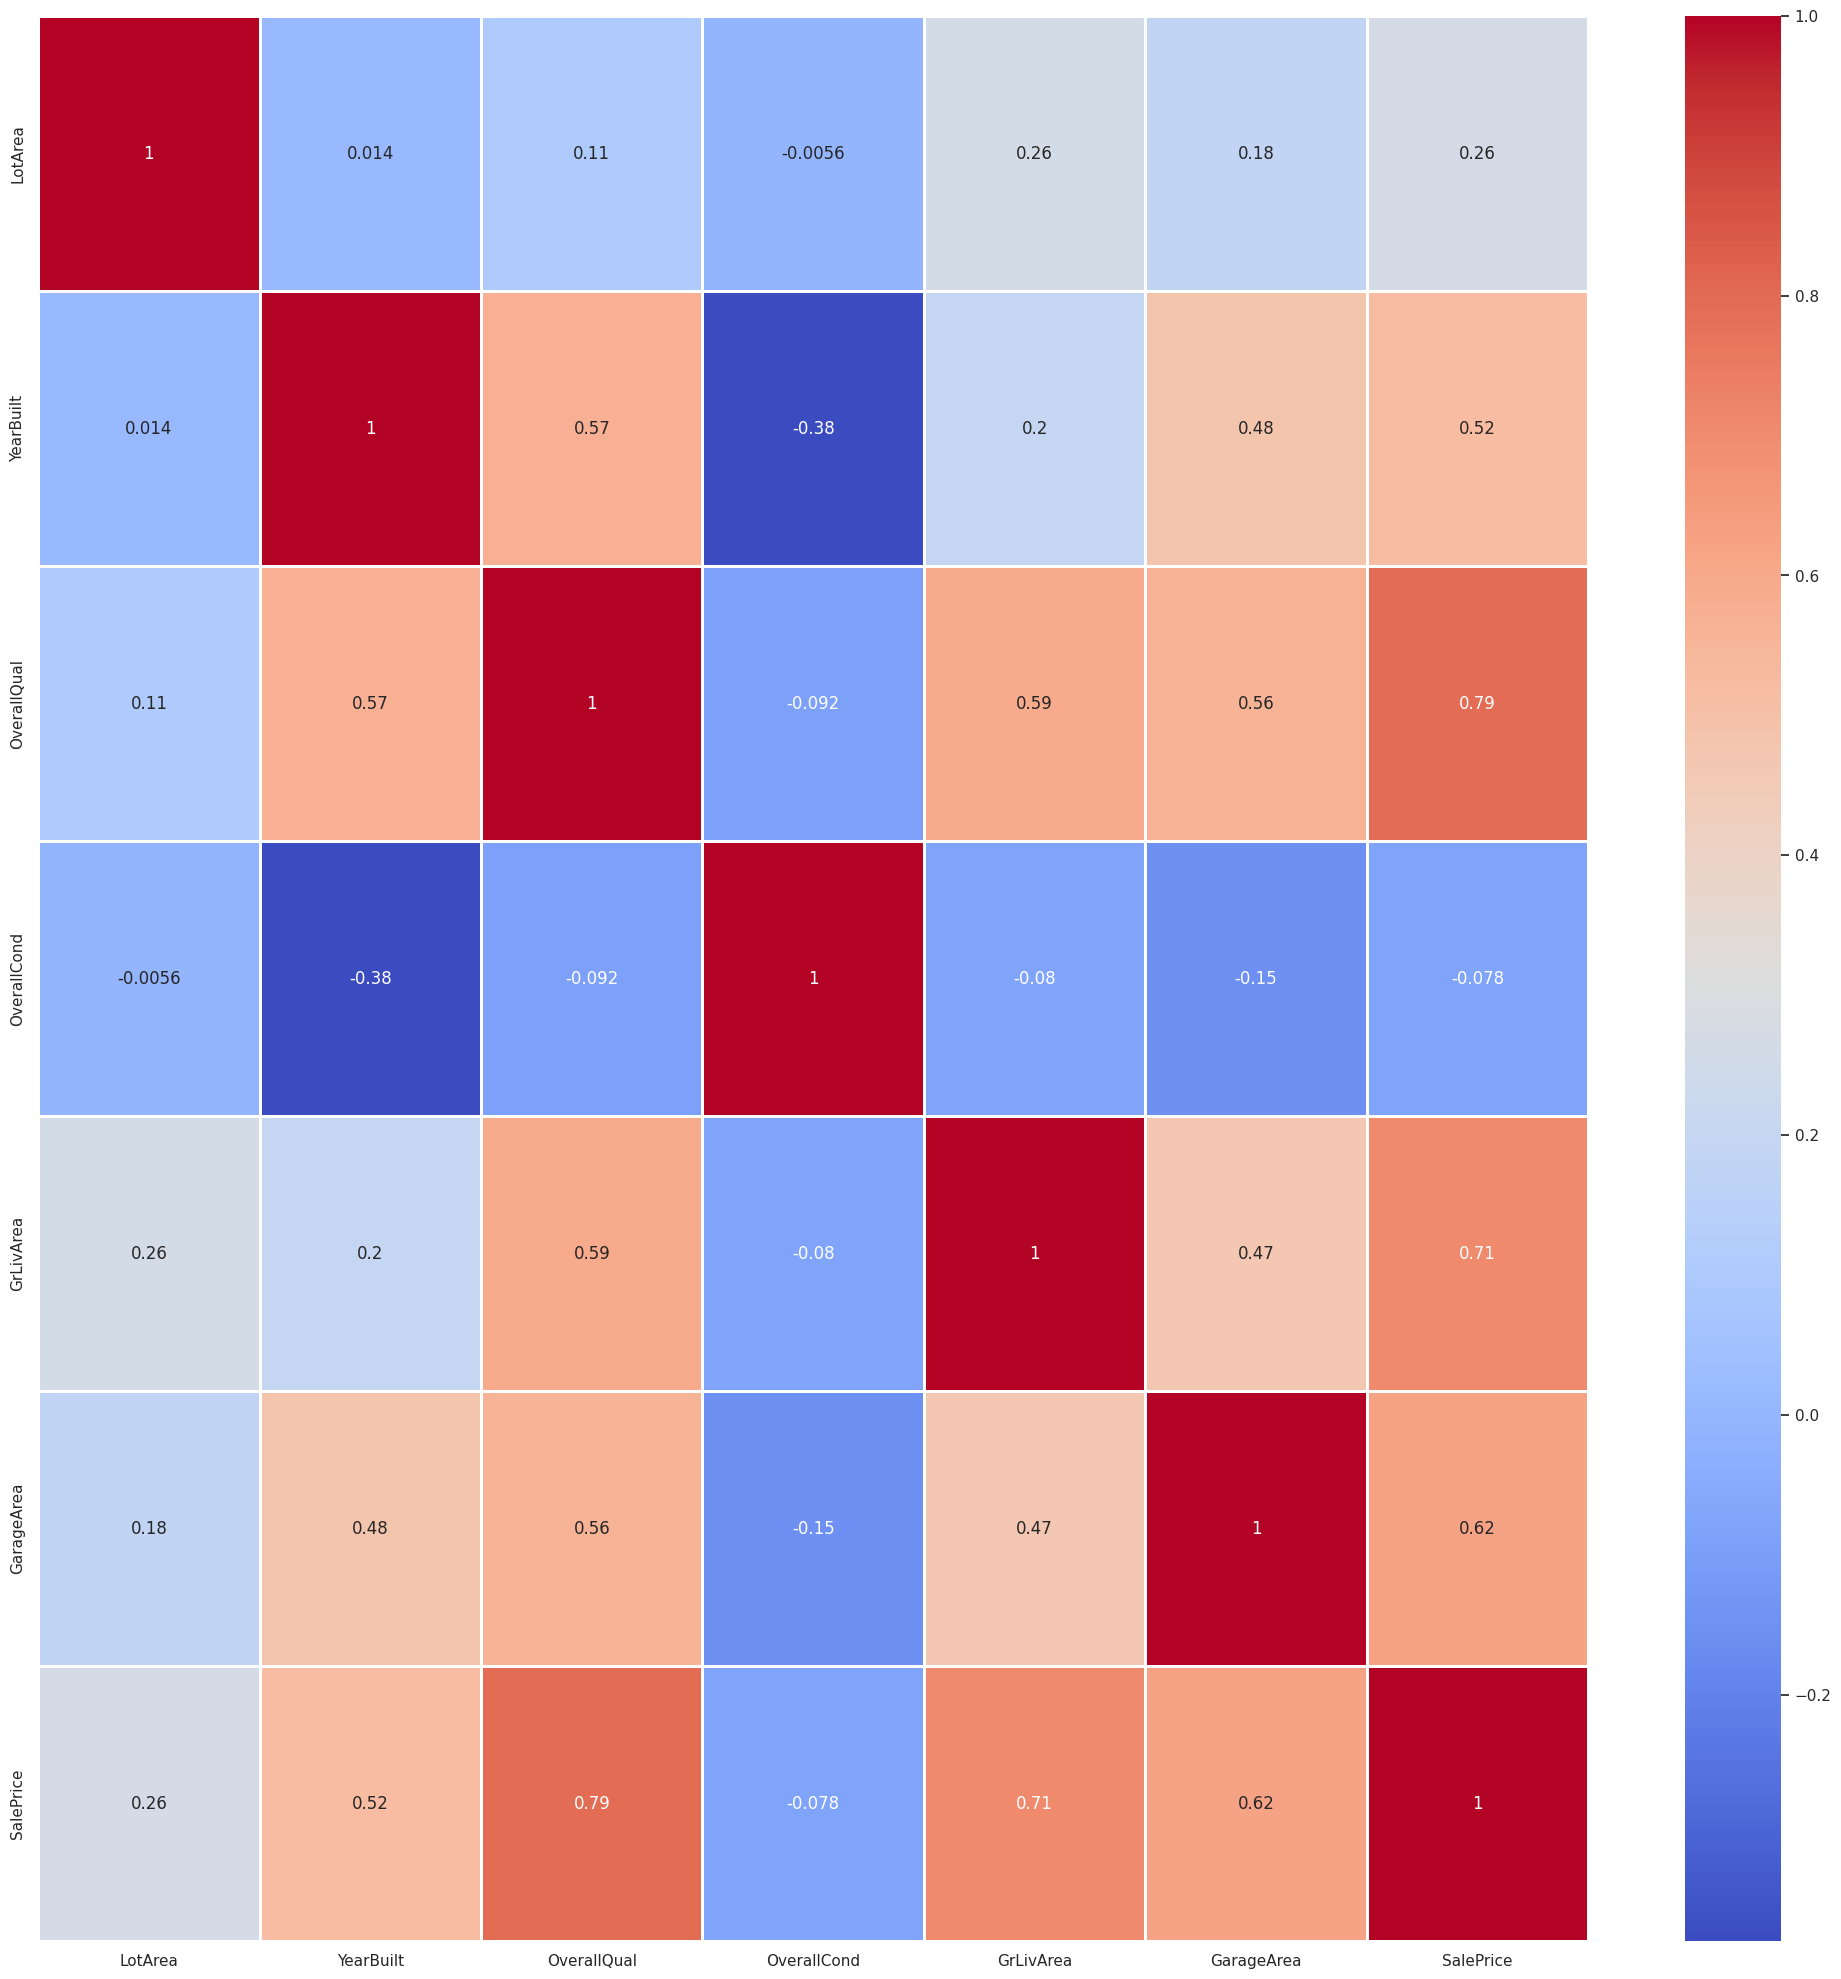

In [ ]:
plt.figure(figsize=(25,25))
ax = sns.heatmap(df_train.corr(), cmap = "coolwarm", annot=True, linewidth=2)

In [ ]:
hig_corr = df_train.corr()
hig_corr["SalePrice"]

LotArea        0.263843
YearBuilt      0.522897
OverallQual    0.790982
OverallCond   -0.077856
GrLivArea      0.708624
GarageArea     0.623431
SalePrice      1.000000
Name: SalePrice, dtype: float64

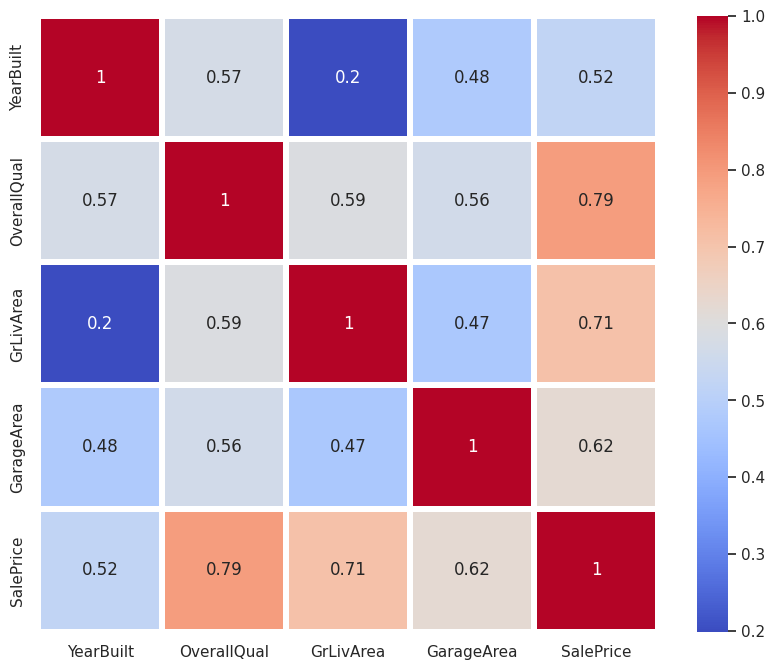

In [ ]:
# tampilkan heatmap hanya untuk kolom2 yg nilai korelasinya dengan SalePrice >= 0.5
hig_corr_features = hig_corr.index[abs(hig_corr["SalePrice"]) >= 0.5]

plt.figure(figsize=(10,8))
ax = sns.heatmap(df_train[hig_corr_features].corr(), cmap = "coolwarm", annot=True, linewidth=3)

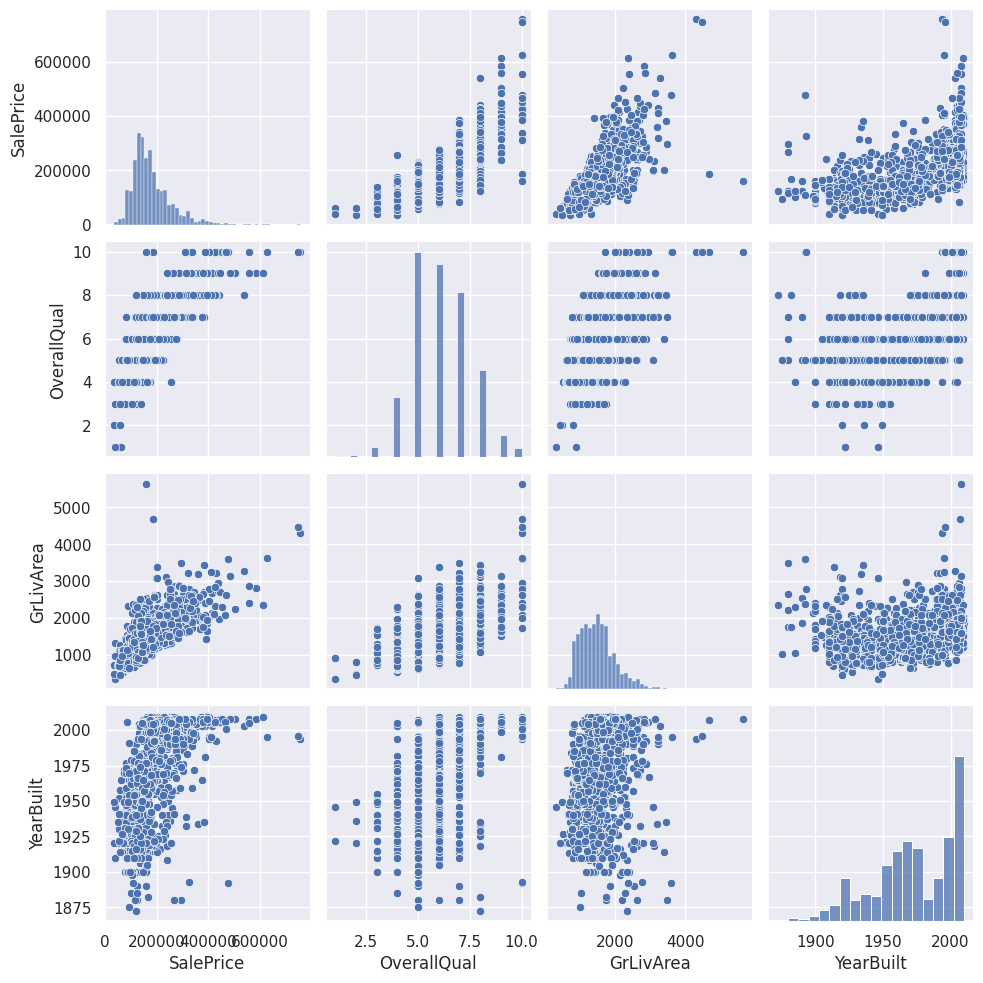

In [ ]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()

# **Target Variable**

## **Comparing SalePrice with it's normal distribution**

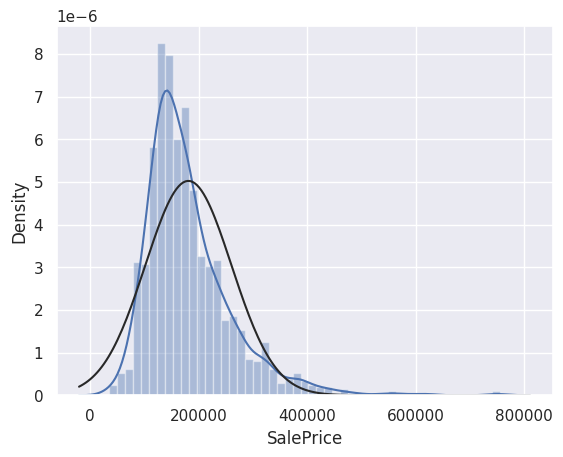

In [ ]:
sns.distplot(df_train['SalePrice'], fit = norm);

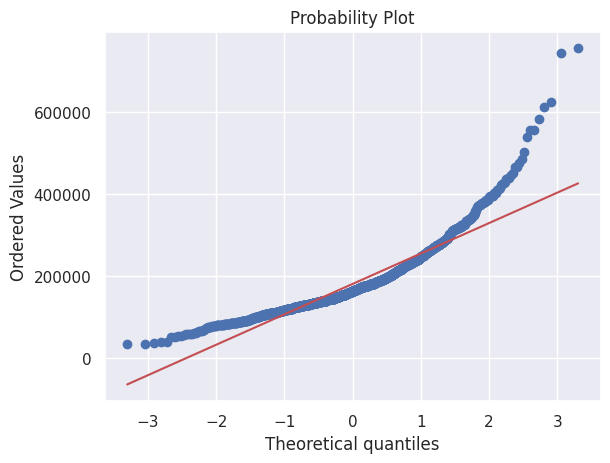

In [ ]:
# QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

## **Log Transformation for Target Variable**

In [ ]:
df_train['SalePrice'].mean()

180921.19589041095

In [ ]:
np.log1p(755000)

13.534474352733596

In [ ]:
df_train_tf = df_train.copy()

# We use the numpy function log1p which  applies ln(1+x) to all elements of the column
df_train_tf["SalePrice"] = np.log1p(df_train["SalePrice"])

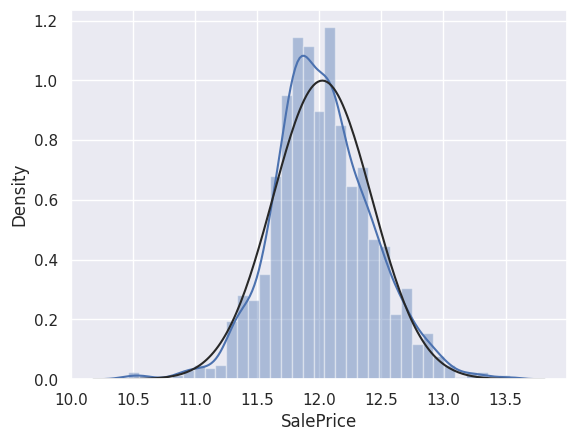

In [ ]:
# Check the new distribution
sns.distplot(df_train_tf['SalePrice'] , fit=norm);

# Print Mu dan Sigma
# (mu, sigma) = norm.fit(df_train_tf['SalePrice'])
# print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# # Plot Distribusi
# plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
#             loc='best')
# plt.ylabel('Frequency')
# plt.title('SalePrice distribution')

In [ ]:
df_train_tf['SalePrice'].describe()

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

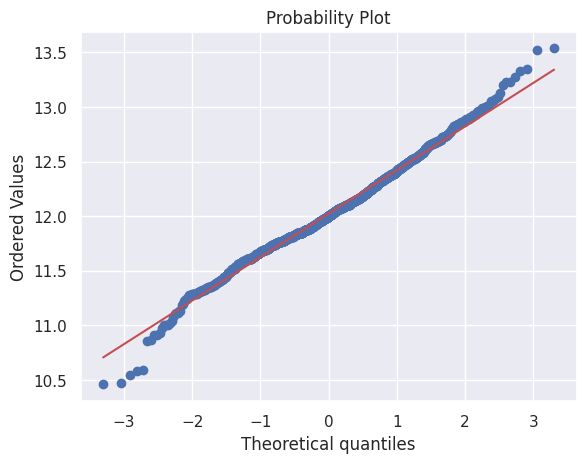

In [ ]:
#QQ Plot
fig = plt.figure()
res = stats.probplot(df_train_tf['SalePrice'], plot=plt)
plt.show()

# **Menggabungkan train set dan test set**

In [ ]:
ntrain = df_train_tf.shape[0]
ntest = df_test.shape[0]
y_train = df_train_tf.SalePrice.values
all_data = pd.concat((df_train_tf, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2919, 8)


In [ ]:
print(ntrain, ntest)

1460 1459


# **Missing Value Analysis**

In [ ]:
total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()/all_data.isnull().count() * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
MiscFeature,2814,96.402878
GarageArea,1,0.034258
KitchenQual,1,0.034258
LotArea,0,0.000000
YearBuilt,0,0.000000
OverallQual,0,0.000000
OverallCond,0,0.000000
GrLivArea,0,0.000000


In [ ]:
all_data['MiscFeature']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
2914     NaN
2915     NaN
2916     NaN
2917    Shed
2918     NaN
Name: MiscFeature, Length: 2919, dtype: object

In [ ]:
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')

In [ ]:
all_data['MiscFeature'].value_counts()

None    2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64

In [ ]:
all_data['GarageArea'] = all_data['GarageArea'].fillna(0)

In [ ]:
all_data['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [ ]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [ ]:
#Check remaining missing values if any
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotArea      2919 non-null   int64  
 1   YearBuilt    2919 non-null   int64  
 2   OverallQual  2919 non-null   int64  
 3   OverallCond  2919 non-null   int64  
 4   GrLivArea    2919 non-null   int64  
 5   MiscFeature  2919 non-null   object 
 6   GarageArea   2919 non-null   float64
 7   KitchenQual  2919 non-null   object 
dtypes: float64(1), int64(5), object(2)
memory usage: 182.6+ KB


In [ ]:
#Changing OverallQual and OverallCond into a categorical variable
all_data['OverallQual'] = all_data['OverallQual'].astype(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

In [ ]:
all_data

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,8450,2003,7,5,1710,None,548.0,Gd
1,9600,1976,6,8,1262,None,460.0,TA
2,11250,2001,7,5,1786,None,608.0,Gd
3,9550,1915,7,5,1717,None,642.0,Gd
4,14260,2000,8,5,2198,None,836.0,Gd
...,...,...,...,...,...,...,...,...
2914,1936,1970,4,7,1092,None,0.0,TA
2915,1894,1970,4,5,1092,None,286.0,TA
2916,20000,1960,5,7,1224,None,576.0,TA
2917,10441,1992,5,5,970,Shed,0.0,TA


# **Feature Engineering**

## **Label Encoding**

In [ ]:
tmp_data = all_data.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ('OverallQual', 'OverallCond', 'KitchenQual') #masih sisa 'MiscFeature'
encoders = {}

for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(tmp_data[c].values))
    tmp_data[c] = lbl.transform(list(tmp_data[c].values))
    encoders[c] = lbl # encoder untuk tiap kolom kita simpan untuk deployment nanti

# shape
print('Shape tmp_data: {}'.format(tmp_data.shape))

Shape tmp_data: (2919, 8)


In [ ]:
tmp_data

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,8450,2003,7,4,1710,None,548.0,2
1,9600,1976,6,7,1262,None,460.0,3
2,11250,2001,7,4,1786,None,608.0,2
3,9550,1915,7,4,1717,None,642.0,2
4,14260,2000,8,4,2198,None,836.0,2
...,...,...,...,...,...,...,...,...
2914,1936,1970,4,6,1092,None,0.0,3
2915,1894,1970,4,4,1092,None,286.0,3
2916,20000,1960,5,6,1224,None,576.0,3
2917,10441,1992,5,4,970,Shed,0.0,3


## **Skewness Treatment untuk Features**

In [ ]:
from scipy.stats import norm, skew

numeric_feats = tmp_data.dtypes[tmp_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = tmp_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkewness in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skewness in numerical features: 



,Skew
LotArea,12.822431
GrLivArea,1.269358
OverallCond,0.570312
GarageArea,0.239257
OverallQual,-0.326653
YearBuilt,-0.599806
KitchenQual,-1.448023


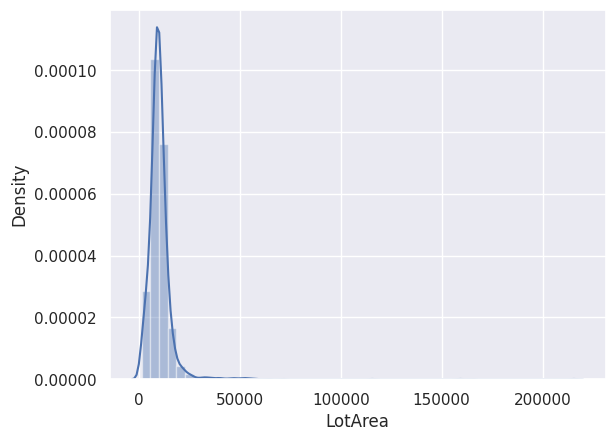

In [ ]:
sns.distplot(tmp_data['LotArea']);

In [ ]:
tmp_data['LotArea'].describe()

count      2919.000000
mean      10168.114080
std        7886.996359
min        1300.000000
25%        7478.000000
50%        9453.000000
75%       11570.000000
max      215245.000000
Name: LotArea, dtype: float64

## **Box Cox Transformation**

In [ ]:
# lakukan box-cox transformation untuk feature2 yg nilai skewness-nya > 0.75
skewness = skewness[abs(skewness['Skew']) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

There are 3 skewed numerical features to Box Cox transform


In [ ]:
skewness.index.tolist()

['LotArea', 'GrLivArea', 'KitchenQual']

In [ ]:
# lakukan tranformasi box cox
from scipy.special import boxcox1p

skewed_features = skewness.index
lam = 0.20
for feat in skewed_features:
    tmp_data[feat] = boxcox1p(tmp_data[feat], lam)

In [ ]:
tmp_data

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,25.503637,2003,7,4,17.162564,None,548.0,1.228655
1,26.291998,1976,6,7,15.856944,None,460.0,1.597540
2,27.300424,2001,7,4,17.356042,None,608.0,1.228655
3,26.259338,1915,7,4,17.180669,None,642.0,1.228655
4,28.868815,2000,8,4,18.303173,None,836.0,1.228655
...,...,...,...,...,...,...,...,...
2914,17.719351,1970,4,6,15.262547,None,0.0,1.597540
2915,17.619961,1970,4,4,15.262547,None,286.0,1.597540
2916,31.239346,1960,5,6,15.729901,None,576.0,1.597540
2917,26.821947,1992,5,4,14.788544,Shed,0.0,1.597540


## **Skewness after Box Cox Transformation**

In [ ]:
# Check the skew of all numerical features
skewed_feats = tmp_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



,Skew
OverallCond,0.570312
LotArea,0.496692
GarageArea,0.239257
GrLivArea,0.230000
OverallQual,-0.326653
YearBuilt,-0.599806
KitchenQual,-2.156088


<Axes: xlabel='GrLivArea', ylabel='Density'>

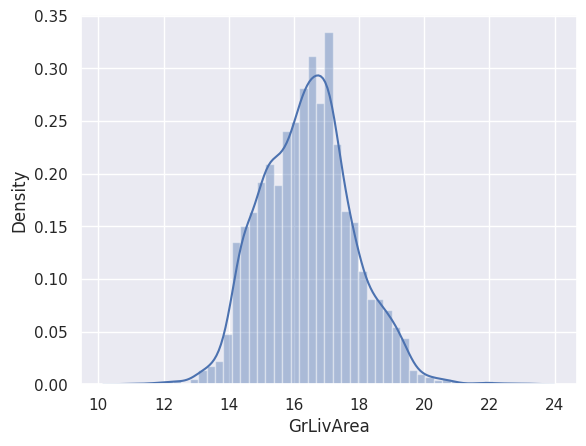

In [ ]:
sns.distplot(tmp_data['GrLivArea'])

## **One-Hot Encoding**

In [ ]:
tmp_data['MiscFeature'].unique()

array(['None', 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [ ]:
tmp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotArea      2919 non-null   float64
 1   YearBuilt    2919 non-null   int64  
 2   OverallQual  2919 non-null   int64  
 3   OverallCond  2919 non-null   int64  
 4   GrLivArea    2919 non-null   float64
 5   MiscFeature  2919 non-null   object 
 6   GarageArea   2919 non-null   float64
 7   KitchenQual  2919 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 182.6+ KB


In [ ]:
tmp_data = pd.get_dummies(tmp_data, drop_first=True) # one hot encoding untuk fitur kategorikal di dataset
print(tmp_data.shape)

(2919, 11)


In [ ]:
tmp_data

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,GarageArea,KitchenQual,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,25.503637,2003,7,4,17.162564,548.0,1.228655,1,0,0,0
1,26.291998,1976,6,7,15.856944,460.0,1.597540,1,0,0,0
2,27.300424,2001,7,4,17.356042,608.0,1.228655,1,0,0,0
3,26.259338,1915,7,4,17.180669,642.0,1.228655,1,0,0,0
4,28.868815,2000,8,4,18.303173,836.0,1.228655,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2914,17.719351,1970,4,6,15.262547,0.0,1.597540,1,0,0,0
2915,17.619961,1970,4,4,15.262547,286.0,1.597540,1,0,0,0
2916,31.239346,1960,5,6,15.729901,576.0,1.597540,1,0,0,0
2917,26.821947,1992,5,4,14.788544,0.0,1.597540,0,0,1,0


In [ ]:
one_hot_columns = tmp_data.columns #kita simpan kolom2 hasil encoding untuk digunakan nanti

## **Scaling**

In [ ]:
# menggunakan robust scaler untuk mengurangi dampak outlier di tiap kolom
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(tmp_data)
tmp_data = scaler.transform(tmp_data)

In [ ]:
pd.DataFrame(tmp_data)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.254874,0.631579,0.5,0.0,0.395595,0.265625,-1.0,0.0,0.0,0.0,0.0
1,0.035514,0.063158,0.0,3.0,-0.305745,-0.078125,0.0,0.0,0.0,0.0,0.0
2,0.406961,0.589474,0.5,0.0,0.499525,0.500000,-1.0,0.0,0.0,0.0,0.0
3,0.023483,-1.221053,0.5,0.0,0.405320,0.632812,-1.0,0.0,0.0,0.0,0.0
4,0.984668,0.568421,1.0,0.0,1.008295,1.390625,-1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2914,-3.122167,-0.063158,-1.0,2.0,-0.625037,-1.875000,0.0,0.0,0.0,0.0,0.0
2915,-3.158777,-0.063158,-1.0,0.0,-0.625037,-0.757812,0.0,0.0,0.0,0.0,0.0
2916,1.857838,-0.273684,-0.5,2.0,-0.373989,0.375000,0.0,0.0,0.0,0.0,0.0
2917,0.230717,0.400000,-0.5,0.0,-0.879657,-1.875000,0.0,-1.0,0.0,1.0,0.0


## **Split Train Test**

In [ ]:
X_train = tmp_data[:ntrain]
X_test = tmp_data[ntrain:]

X_train.shape, X_test.shape, y_train.shape

((1460, 11), (1459, 11), (1460,))

# **Modelling**

## **Kfold and Evaluation Score**

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

# fungsi untuk melakukan cross validation
def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits = 4, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score)

    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
    score = [r2_val_score.mean()]
    return score

## **Linear Regression**

In [ ]:
import sklearn.linear_model as linear_model
LR = linear_model.LinearRegression()
test_model(LR)

[0.8273595400084589]

## **Lasso Regression**

In [ ]:
lasso = linear_model.Lasso(alpha=1e-4)
test_model(lasso)

[0.828304803043606]

## **Support Vector Regressor**

In [ ]:
from sklearn.svm import SVR
svr_reg = SVR(kernel= 'rbf')
test_model(svr_reg)

[0.8358821248717199]

## **XGBoost**

In [ ]:
# !pip install --upgrade xgboost

In [ ]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
test_model(xgb_reg)

[0.8098749535594161]

In [ ]:
all_data #data original sebelum transformasi

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,8450,2003,7,5,1710,None,548.0,Gd
1,9600,1976,6,8,1262,None,460.0,TA
2,11250,2001,7,5,1786,None,608.0,Gd
3,9550,1915,7,5,1717,None,642.0,Gd
4,14260,2000,8,5,2198,None,836.0,Gd
...,...,...,...,...,...,...,...,...
2914,1936,1970,4,7,1092,None,0.0,TA
2915,1894,1970,4,5,1092,None,286.0,TA
2916,20000,1960,5,7,1224,None,576.0,TA
2917,10441,1992,5,5,970,Shed,0.0,TA


# **Coba Prediksi Data Baru**

In [ ]:
model = svr_reg.fit(X_train, y_train)

In [ ]:
pd.DataFrame(tmp_data)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.254874,0.631579,0.5,0.0,0.395595,0.265625,-1.0,0.0,0.0,0.0,0.0
1,0.035514,0.063158,0.0,3.0,-0.305745,-0.078125,0.0,0.0,0.0,0.0,0.0
2,0.406961,0.589474,0.5,0.0,0.499525,0.500000,-1.0,0.0,0.0,0.0,0.0
3,0.023483,-1.221053,0.5,0.0,0.405320,0.632812,-1.0,0.0,0.0,0.0,0.0
4,0.984668,0.568421,1.0,0.0,1.008295,1.390625,-1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2914,-3.122167,-0.063158,-1.0,2.0,-0.625037,-1.875000,0.0,0.0,0.0,0.0,0.0
2915,-3.158777,-0.063158,-1.0,0.0,-0.625037,-0.757812,0.0,0.0,0.0,0.0,0.0
2916,1.857838,-0.273684,-0.5,2.0,-0.373989,0.375000,0.0,0.0,0.0,0.0,0.0
2917,0.230717,0.400000,-0.5,0.0,-0.879657,-1.875000,0.0,-1.0,0.0,1.0,0.0


In [ ]:
model.predict(tmp_data[0].reshape(1,-1)) # coba prediksi baris pertama dataset kita

array([12.25771747])

In [ ]:
np.expm1(12.25771747) # expm1(x) = e^x - 1, atau invers dari ln

210599.33513183476

In [ ]:
np.expm1(y_train[0]) # harga rumah sebenarnya untuk dataset baris pertama. coba bandingkan dengan hasil prediksi di atas

208499.99999999983

In [ ]:
# nyoba input data baru untuk diprediksi berapa harga rumahnya
data_baru = {'LotArea': [8000],
             'YearBuilt':[2010],
             'OverallQual':['8'],
             'OverallCond':['7'],
             'GrLivArea':[2000],
            'MiscFeature':['Shed'],
             'GarageArea': [500],
             'KitchenQual': ['Gd']}

In [ ]:
tmp = pd.DataFrame(data_baru)

In [ ]:
tmp

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,8000,2010,8,7,2000,Shed,500,Gd


In [ ]:
data_baru_tf = data_baru.copy()

In [ ]:
#pre processing label encoding untuk data baru
data_baru_tf['OverallQual'] = encoders['OverallQual'].transform(tmp['OverallQual'])[0]
data_baru_tf['OverallCond'] = encoders['OverallCond'].transform(tmp['OverallCond'])[0]
data_baru_tf['KitchenQual'] = encoders['KitchenQual'].transform(tmp['KitchenQual'])[0]

In [ ]:
# transformasi boxcox untuk kolom LotArea, GrLivArea, dan KitchenQual
data_baru_tf['LotArea'] = boxcox1p(tmp['LotArea'], lam)[0]
data_baru_tf['GrLivArea'] = boxcox1p(tmp['GrLivArea'], lam)[0]
data_baru_tf['KitchenQual'] = boxcox1p(data_baru_tf['KitchenQual'], lam)

In [ ]:
tmp = pd.DataFrame(data_baru_tf)

In [ ]:
tmp = pd.get_dummies(tmp, columns = ['MiscFeature'])

In [ ]:
tmp

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,GarageArea,KitchenQual,MiscFeature_Shed
0,25.171636,2010,8,6,17.867539,500,1.228655,1


In [ ]:
one_hot_columns #ingat, perlu tambahkan kolom hasil one-hot encoding lainnya seperti di data training

Index(['LotArea', 'YearBuilt', 'OverallQual', 'OverallCond', 'GrLivArea',
       'GarageArea', 'KitchenQual', 'MiscFeature_None', 'MiscFeature_Othr',
       'MiscFeature_Shed', 'MiscFeature_TenC'],
      dtype='object')

In [ ]:
# Menambahkan kolom-kolom yang hilang pada data baru
for kolom in one_hot_columns:
    if kolom not in tmp.columns:
        tmp[kolom] = 0

In [ ]:
tmp

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,GarageArea,KitchenQual,MiscFeature_Shed,MiscFeature_None,MiscFeature_Othr,MiscFeature_TenC
0,25.171636,2010,8,6,17.867539,500,1.228655,1,0,0,0


In [ ]:
# jangan lupa lakukan scaling
tmp_scaled = scaler.transform(tmp.loc[0].values.reshape(1,-1))

In [ ]:
y = np.expm1(model.predict(tmp_scaled))
print(y)

[258286.84602464]


In [ ]:
pd.DataFrame(data_baru)

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,8000,2010,8,7,2000,Shed,500,Gd
